In [333]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [334]:
#Cargar desde un archivo .csv sin indice
df = pd.read_csv('Mexico_Limpio.csv')
df.head(5)

,Unnamed: 0.1,Unnamed: 0,listing_url,last_scraped,source,name,neighborhood_overview,picture_url,host_url,host_name,...,beds,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_communication,review_scores_location,reviews_per_month
0,0,0,https://www.airbnb.com/rooms/35797,2024-09-25,city scrape,Villa Dante,"Santa Fe Mall, Interloma Park and the Lion Des...",https://a0.muscache.com/pictures/f395ab78-1185...,https://www.airbnb.com/users/show/153786,Dici,...,1.0,1.0,7,363,0.0,4.80,4.90,4.90,4.90,1.70
1,1,1,https://www.airbnb.com/rooms/44616,2024-09-26,previous scrape,Condesa Haus,The neighborhood is very nice,https://a0.muscache.com/pictures/251410/ec75fe...,https://www.airbnb.com/users/show/196253,Fernando,...,1.0,1.0,365,325,64.0,4.58,4.70,4.78,4.98,0.41
2,2,2,https://www.airbnb.com/rooms/67703,2024-09-26,city scrape,"2 bedroom apt. deco bldg, Condesa",The neighborhood is very nice,https://a0.muscache.com/pictures/3281720/6f078...,https://www.airbnb.com/users/show/334451,Nicholas,...,2.0,2.0,30,325,49.0,4.90,4.75,4.92,4.98,0.31
3,3,3,https://www.airbnb.com/rooms/70644,2024-09-25,city scrape,Beautiful light Studio Coyoacan- full equipped !,Coyoacan is a beautiful neighborhood famous fo...,https://a0.muscache.com/pictures/f397d2da-d045...,https://www.airbnb.com/users/show/212109,Trisha,...,1.0,1.6,180,257,127.0,4.91,4.96,4.98,4.96,0.83
4,4,4,https://www.airbnb.com/rooms/107078,2024-09-25,city scrape,NEW DESIGNER LOFT,"Is located in the best area of Mexico City, Po...",https://a0.muscache.com/pictures/bd64f86d-4931...,https://www.airbnb.com/users/show/540705,Andrea,...,1.0,1.0,365,275,11.0,4.91,5.00,4.73,4.91,0.11


In [335]:
df["id"].dtype

dtype('int64')

In [336]:
print(list(df["bathrooms_text"].unique()))


['1 bath', '5.5 baths', '1.5 baths', '1 private bath', '5 baths', '2.5 baths', '4.5 baths', '1 shared bath', '3.5 baths', '1.5 shared baths', '2 baths', '0 baths', '2 shared baths', '6 baths', '3 baths', '0 shared baths', '8 shared baths', '3 shared baths', '10 baths', '2.5 shared baths', '16 baths', '4 shared baths', '5 shared baths', '4 baths', '7 baths', '20 baths', '4.5 shared baths', 'Shared half-bath', 'Half-bath', '49 baths', '10 shared baths', '3.5 shared baths', '46 baths', '8.5 baths', '7.5 baths', '9 baths', '8 baths', '6 shared baths', '14 baths', '11 baths', '6.5 baths', '15 baths', '13 baths', '13 shared baths', '17 baths', '12 shared baths', 'Private half-bath', '12 baths', '9.5 baths', '14.5 baths', '11.5 shared baths', '18 baths', '12.5 baths', '11.5 baths', '11 shared baths', '10.5 baths', '21 baths', '29 baths']


#host_response_time
#host_is_superhost
#host_response_rate
#reviews_per_month

In [337]:
df['host_response_time'] = df['host_response_time'].map({'a few days or more':1, 'within an hour':2,'within a few hours':3, 'within a day':4})
df['host_is_superhost'] = df['host_is_superhost'].map({'t': 1, 'f': 0})
df["host_response_rate"] = df["host_response_rate"].str.rstrip('%').astype(float) / 100
df['room_type'] = df['room_type'].map({'Entire home/apt': 1,'Private room': 2,'Shared room': 3,'Hotel room': 4})
df["host_acceptance_rate"] = df["host_acceptance_rate"].str.rstrip('%').astype(float) / 100
df['host_verifications'] = df['host_verifications'].map({"['email', 'phone', 'work_email']":1, "['email', 'phone']":2, "['phone']": 3,"['phone', 'work_email']": 4, "['email']": 5,"[]": 6,"['email', 'work_email']": 7,"['work_email']": 8})
df['host_has_profile_pic'] = df['host_has_profile_pic'].map({'t': 1, 'f': 0})
df['host_identity_verified'] = df['host_identity_verified'].map({'t': 1, 'f': 0})
df['has_availability'] = df['has_availability'].map({'t': 1, 'f': 0})
df['instant_bookable'] = df['instant_bookable'].map({'t': 1, 'f': 0})


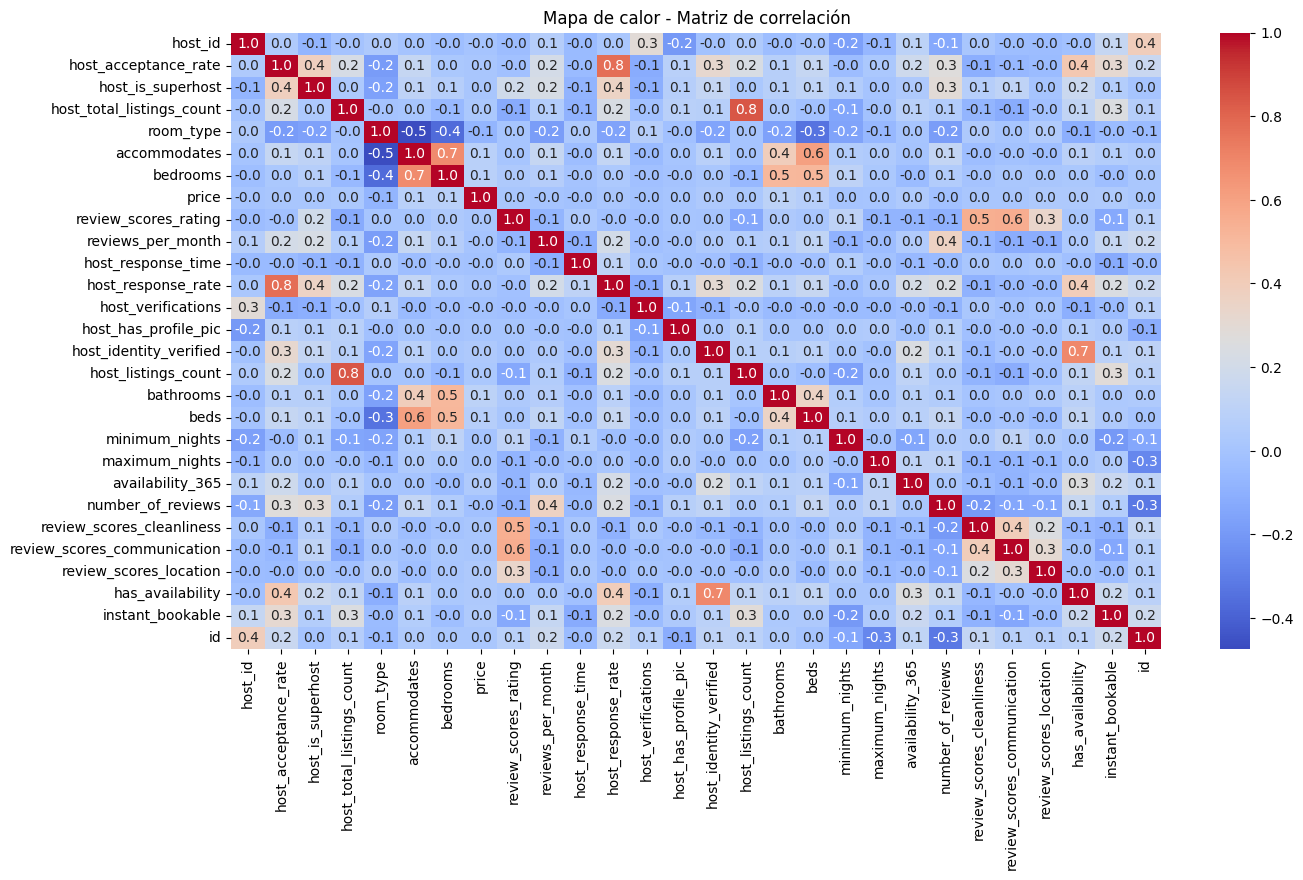

In [338]:
# Seleccionar solo variables numéricas
df = df[['host_id', 'host_acceptance_rate', 'host_is_superhost', 'host_total_listings_count', 
                 'room_type', 'accommodates', 'bedrooms', 'price','review_scores_rating', 'reviews_per_month', 
                 'host_response_time', "host_response_rate", "host_verifications", "host_has_profile_pic", 
                 "host_identity_verified", "host_listings_count", "bathrooms", "beds", "minimum_nights", "maximum_nights", 
                 "availability_365", "number_of_reviews", "review_scores_cleanliness", "review_scores_communication", "review_scores_location", 
                 "has_availability", 'instant_bookable', "id"]]

# Crear el mapa de calor
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".1f")
plt.title("Mapa de calor - Matriz de correlación")
plt.show()

<Axes: >

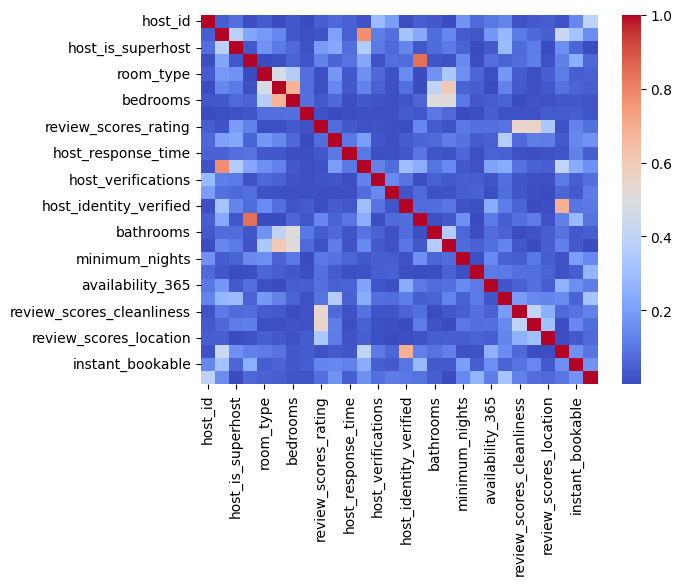

In [339]:
#Encontramos todas las correlaciones entre las varaibles
Corr_Factors=df.corr()
Corr_Factors

#Enocntramos el valor absoluto de todas las relaciones entre las varaibles
Corr_Factors1=abs(Corr_Factors)
Corr_Factors1

#Graficamos el mapa de calor de los coeficientes de correlación
Heat_Map = sns.heatmap(Corr_Factors1, cmap='coolwarm')
Heat_Map



<Axes: >

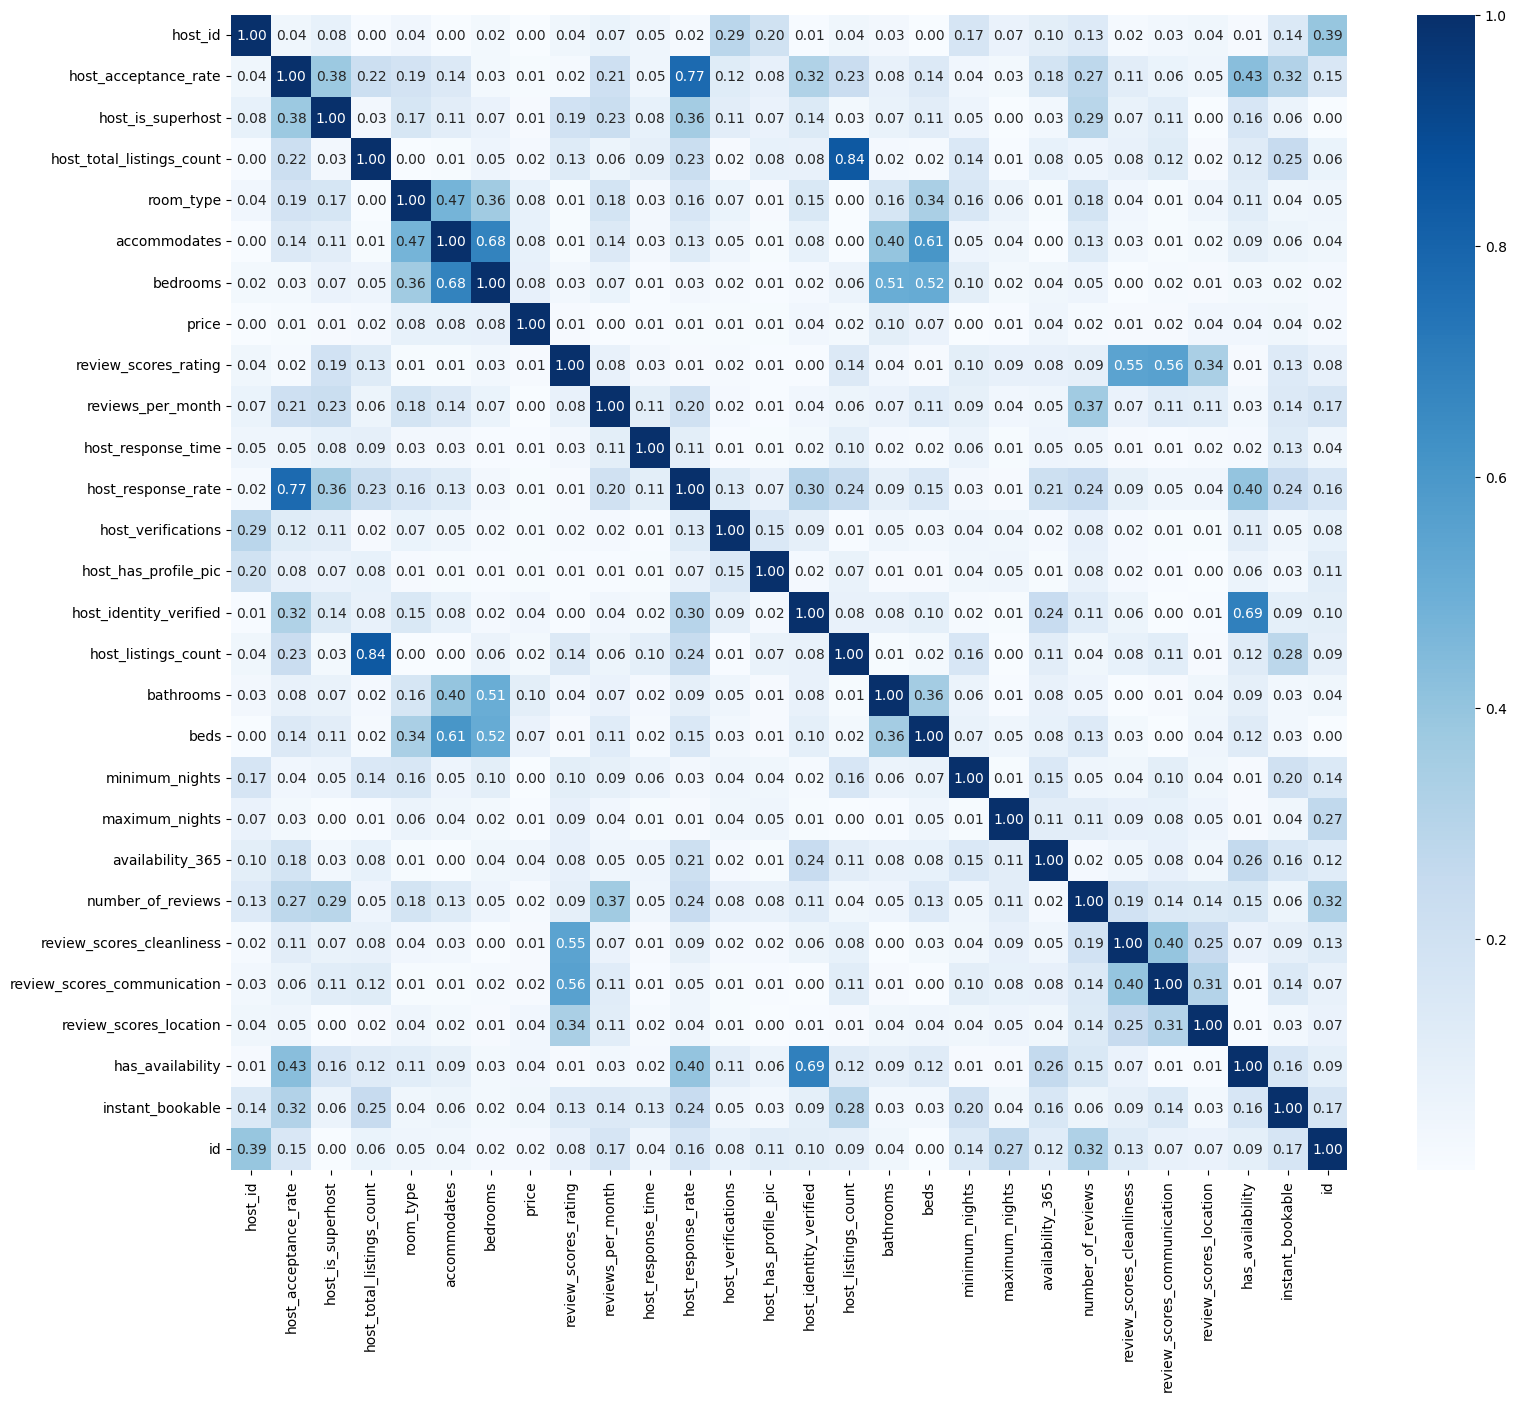

In [340]:
#Ajustamos el mapa de calor de los coeficientes de correlación
plt.figure(figsize=(18, 15))
Heat_Map=sns.heatmap(Corr_Factors1,cmap='Blues', annot=True, fmt=".2f",)
Heat_Map

**host_id**
*************************************************************

<Axes: xlabel='id', ylabel='host_id'>

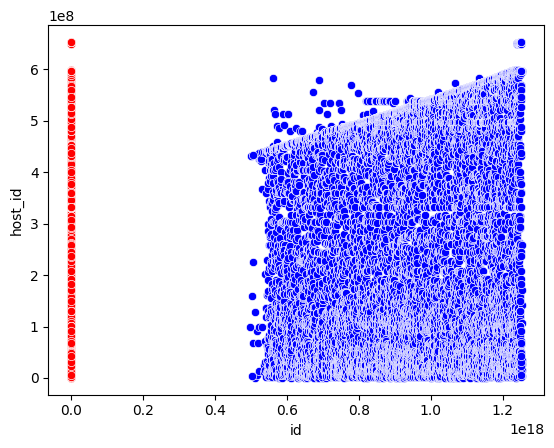

In [341]:
from turtle import color
sns.scatterplot(x='id', y='host_id', color="blue", data=df)
sns.scatterplot(x='host_verifications', y='host_id', color="orange", data=df)
sns.scatterplot(x='host_has_profile_pic', y='host_id', color="red", data=df)

In [342]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['id', 'host_verifications', 'host_has_profile_pic']]
Var_Dep= df['host_id']


#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()


#Verificamos la función relacionada al modelo
type(model)


#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [343]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['id', 'host_verifications', 'host_has_profile_pic'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([1.47347567e-10, 0.00000000e+00, 0.00000000e+00]),
 'rank_': 1,
 'singular_': array([7.97114737e+19, 8.43960846e+01, 2.13949768e+01]),
 'intercept_': np.float64(137886790.64169908)}

In [344]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.15358108143287597

In [345]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=df[['id', 'host_verifications', 'host_has_profile_pic']])
y_pred

array([1.37886791e+08, 1.37886791e+08, 1.37886791e+08, ...,
       3.22393291e+08, 3.22398118e+08, 3.22399711e+08], shape=(26582,))

In [346]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones1', y_pred)
df

,Predicciones1,host_id,host_acceptance_rate,host_is_superhost,host_total_listings_count,room_type,accommodates,bedrooms,price,review_scores_rating,...,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_cleanliness,review_scores_communication,review_scores_location,has_availability,instant_bookable,id
0,1.378868e+08,153786,0.009,0,1.0,1,2.0,1.0,3865.0,4.80,...,1.0,7,363,0.0,4.90,4.90,4.90,1,0,35797
1,1.378868e+08,196253,0.930,1,13.0,1,2.9,1.4,100.0,4.58,...,1.0,365,325,64.0,4.70,4.78,4.98,1,0,44616
2,1.378868e+08,334451,0.570,1,4.0,1,4.0,2.0,2029.0,4.90,...,2.0,30,325,49.0,4.75,4.92,4.98,1,0,67703
3,1.378868e+08,212109,1.000,1,4.0,1,2.0,1.0,1140.0,4.91,...,1.6,180,257,127.0,4.96,4.98,4.96,1,0,70644
4,1.378868e+08,540705,1.000,1,7.0,1,2.0,1.0,3633.0,4.91,...,1.0,365,275,11.0,5.00,4.73,4.91,1,0,107078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,3.223868e+08,67472234,1.000,1,7.3,2,4.0,2.0,488.0,4.80,...,1.0,45,365,0.0,4.90,4.90,4.90,1,1,1252141718111439700
26578,3.223895e+08,596009321,1.000,0,16.0,2,2.0,1.0,2800.0,4.80,...,1.0,365,177,0.0,4.90,4.90,4.90,1,1,1252159821531694005
26579,3.223933e+08,596009321,1.000,0,16.0,2,2.0,1.0,2700.0,4.80,...,1.0,365,177,0.0,4.90,4.90,4.90,1,1,1252185591721328995
26580,3.223981e+08,596009321,1.000,0,16.0,2,2.0,1.0,2600.0,4.80,...,1.0,365,177,0.0,4.90,4.90,4.90,1,1,1252218347521498445


<Axes: xlabel='id', ylabel='host_id'>

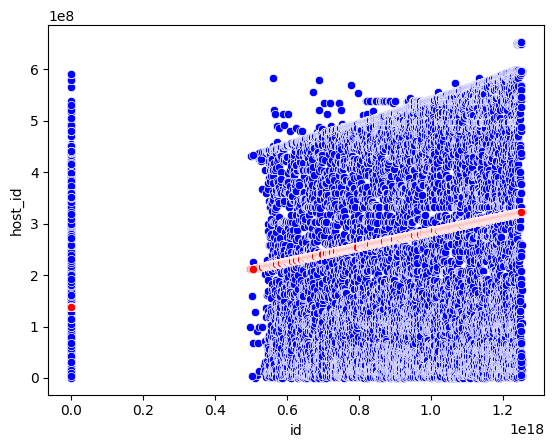

In [347]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='id', y='host_id', color="blue", data=df)
sns.scatterplot(x='id', y='Predicciones1', color="red", data=df)

In [348]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.15358108143287597

In [349]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

np.float64(0.391894222249928)

host_acceptance_rate
*****************************************************************

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

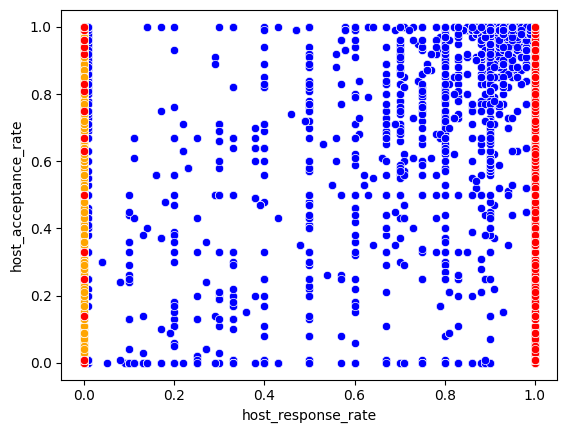

In [350]:
from turtle import color
sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=df)
sns.scatterplot(x='host_is_superhost', y='host_acceptance_rate', color="orange", data=df)
sns.scatterplot(x='has_availability', y='host_acceptance_rate', color="red", data=df)

In [351]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['host_response_rate', 'host_is_superhost', 'has_availability']]
Var_Dep= df['host_acceptance_rate']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

#Verificamos la función relacionada al modelo
type(model)

#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)


LinearRegression()

In [352]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate', 'host_is_superhost', 'has_availability'],
       dtype=object),
 'n_features_in_': 3,
 'coef_': array([0.64863362, 0.08577728, 0.24838578]),
 'rank_': 3,
 'singular_': array([85.02479942, 54.03830119, 28.27806009]),
 'intercept_': np.float64(0.001995911861476962)}

In [353]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)


0.6275194513058897

In [354]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=df[['host_response_rate', 'host_is_superhost', 'has_availability']])
y_pred


array([0.25038169, 0.98479259, 0.79668884, ..., 0.89901531, 0.89901531,
       0.98479259], shape=(26582,))

In [355]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones2', y_pred)
df

,Predicciones2,Predicciones1,host_id,host_acceptance_rate,host_is_superhost,host_total_listings_count,room_type,accommodates,bedrooms,price,...,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_cleanliness,review_scores_communication,review_scores_location,has_availability,instant_bookable,id
0,0.250382,1.378868e+08,153786,0.009,0,1.0,1,2.0,1.0,3865.0,...,1.0,7,363,0.0,4.90,4.90,4.90,1,0,35797
1,0.984793,1.378868e+08,196253,0.930,1,13.0,1,2.9,1.4,100.0,...,1.0,365,325,64.0,4.70,4.78,4.98,1,0,44616
2,0.796689,1.378868e+08,334451,0.570,1,4.0,1,4.0,2.0,2029.0,...,2.0,30,325,49.0,4.75,4.92,4.98,1,0,67703
3,0.984793,1.378868e+08,212109,1.000,1,4.0,1,2.0,1.0,1140.0,...,1.6,180,257,127.0,4.96,4.98,4.96,1,0,70644
4,0.984793,1.378868e+08,540705,1.000,1,7.0,1,2.0,1.0,3633.0,...,1.0,365,275,11.0,5.00,4.73,4.91,1,0,107078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,0.984793,3.223868e+08,67472234,1.000,1,7.3,2,4.0,2.0,488.0,...,1.0,45,365,0.0,4.90,4.90,4.90,1,1,1252141718111439700
26578,0.899015,3.223895e+08,596009321,1.000,0,16.0,2,2.0,1.0,2800.0,...,1.0,365,177,0.0,4.90,4.90,4.90,1,1,1252159821531694005
26579,0.899015,3.223933e+08,596009321,1.000,0,16.0,2,2.0,1.0,2700.0,...,1.0,365,177,0.0,4.90,4.90,4.90,1,1,1252185591721328995
26580,0.899015,3.223981e+08,596009321,1.000,0,16.0,2,2.0,1.0,2600.0,...,1.0,365,177,0.0,4.90,4.90,4.90,1,1,1252218347521498445


<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

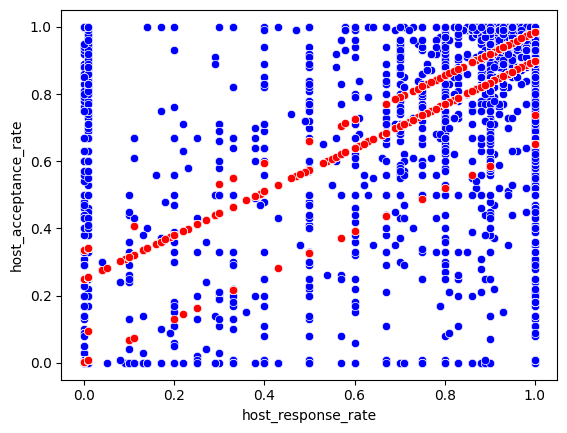

In [356]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=df)
sns.scatterplot(x='host_response_rate', y='Predicciones2', color="red", data=df)


In [357]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter


0.6275194513058897

In [358]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

np.float64(0.7921612533480098)

host_is_superhost
************************************************************************

<Axes: xlabel='host_response_rate', ylabel='host_is_superhost'>

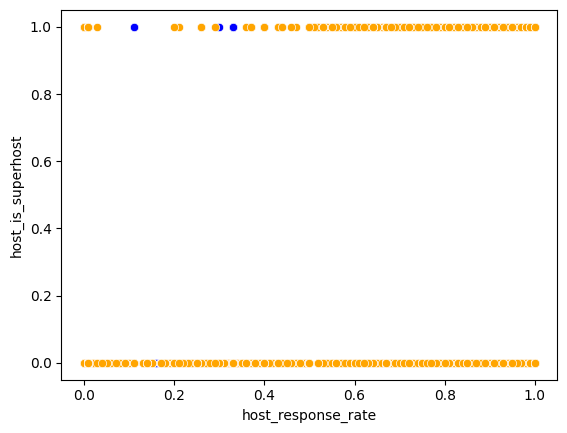

In [359]:
from turtle import color
sns.scatterplot(x='host_response_rate', y='host_is_superhost', color="blue", data=df)
sns.scatterplot(x='host_acceptance_rate', y='host_is_superhost', color="orange", data=df)


In [360]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['host_response_rate', 'host_acceptance_rate']]
Var_Dep= df['host_is_superhost']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

#Verificamos la función relacionada al modelo
type(model)

#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)


LinearRegression()

In [361]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__


{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate', 'host_acceptance_rate'], dtype=object),
 'n_features_in_': 2,
 'coef_': array([0.20323314, 0.3630823 ]),
 'rank_': 2,
 'singular_': array([78.48390729, 27.98142762]),
 'intercept_': np.float64(-0.06513127297548577)}

In [362]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)


0.15560852517365786

In [363]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=df[['host_response_rate', 'host_acceptance_rate']])
y_pred


array([-0.06186353,  0.47576841,  0.28612117, ...,  0.50118417,
        0.50118417,  0.50118417], shape=(26582,))

In [364]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones33', y_pred)
df


,Predicciones33,Predicciones2,Predicciones1,host_id,host_acceptance_rate,host_is_superhost,host_total_listings_count,room_type,accommodates,bedrooms,...,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_cleanliness,review_scores_communication,review_scores_location,has_availability,instant_bookable,id
0,-0.061864,0.250382,1.378868e+08,153786,0.009,0,1.0,1,2.0,1.0,...,1.0,7,363,0.0,4.90,4.90,4.90,1,0,35797
1,0.475768,0.984793,1.378868e+08,196253,0.930,1,13.0,1,2.9,1.4,...,1.0,365,325,64.0,4.70,4.78,4.98,1,0,44616
2,0.286121,0.796689,1.378868e+08,334451,0.570,1,4.0,1,4.0,2.0,...,2.0,30,325,49.0,4.75,4.92,4.98,1,0,67703
3,0.501184,0.984793,1.378868e+08,212109,1.000,1,4.0,1,2.0,1.0,...,1.6,180,257,127.0,4.96,4.98,4.96,1,0,70644
4,0.501184,0.984793,1.378868e+08,540705,1.000,1,7.0,1,2.0,1.0,...,1.0,365,275,11.0,5.00,4.73,4.91,1,0,107078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,0.501184,0.984793,3.223868e+08,67472234,1.000,1,7.3,2,4.0,2.0,...,1.0,45,365,0.0,4.90,4.90,4.90,1,1,1252141718111439700
26578,0.501184,0.899015,3.223895e+08,596009321,1.000,0,16.0,2,2.0,1.0,...,1.0,365,177,0.0,4.90,4.90,4.90,1,1,1252159821531694005
26579,0.501184,0.899015,3.223933e+08,596009321,1.000,0,16.0,2,2.0,1.0,...,1.0,365,177,0.0,4.90,4.90,4.90,1,1,1252185591721328995
26580,0.501184,0.899015,3.223981e+08,596009321,1.000,0,16.0,2,2.0,1.0,...,1.0,365,177,0.0,4.90,4.90,4.90,1,1,1252218347521498445


<Axes: xlabel='host_acceptance_rate', ylabel='host_is_superhost'>

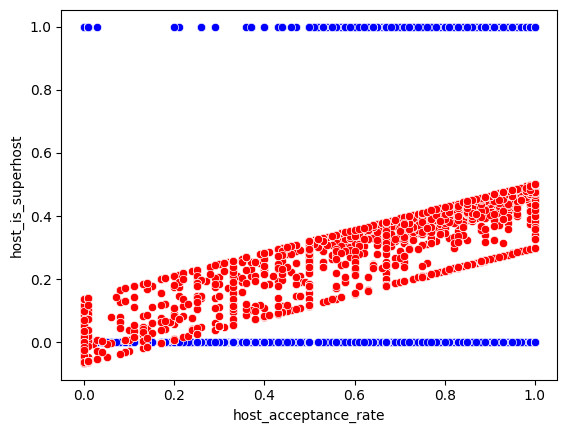

In [365]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='host_acceptance_rate', y='host_is_superhost', color="blue", data=df)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones33', color="red", data=df)


In [366]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter


0.15560852517365786

In [367]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl


np.float64(0.39447246440487815)

host_total_listings_count
******************************************************************

<Axes: xlabel='host_listings_count', ylabel='host_total_listings_count'>

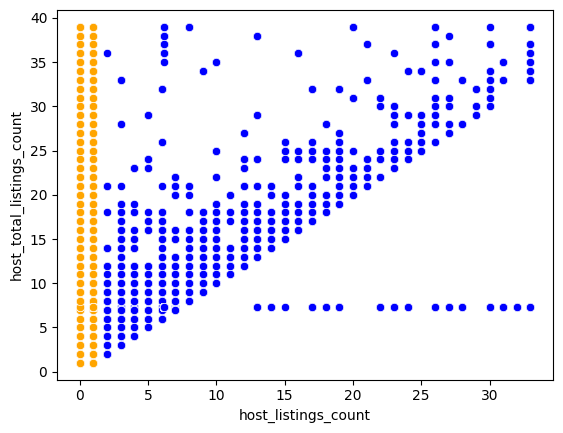

In [368]:
from turtle import color
sns.scatterplot(x='host_listings_count', y='host_total_listings_count', color="blue", data=df)
sns.scatterplot(x='instant_bookable', y='host_total_listings_count', color="orange", data=df)


In [369]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['host_listings_count', 'instant_bookable']]
Var_Dep= df['host_total_listings_count']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

#Verificamos la función relacionada al modelo
type(model)

#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)


LinearRegression()

In [370]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__


{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_listings_count', 'instant_bookable'], dtype=object),
 'n_features_in_': 2,
 'coef_': array([0.96244805, 0.21683222]),
 'rank_': 2,
 'singular_': array([1097.96534394,   76.46062381]),
 'intercept_': np.float64(1.2997567704466828)}

In [371]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)


0.7106854303567822

In [372]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=df[['host_listings_count', 'instant_bookable']])
y_pred


array([ 2.26220482, 12.84913341,  4.18710093, ..., 16.91575785,
       16.91575785,  5.36638121], shape=(26582,))

In [373]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones4', y_pred)
df



,Predicciones4,Predicciones33,Predicciones2,Predicciones1,host_id,host_acceptance_rate,host_is_superhost,host_total_listings_count,room_type,accommodates,...,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_cleanliness,review_scores_communication,review_scores_location,has_availability,instant_bookable,id
0,2.262205,-0.061864,0.250382,1.378868e+08,153786,0.009,0,1.0,1,2.0,...,1.0,7,363,0.0,4.90,4.90,4.90,1,0,35797
1,12.849133,0.475768,0.984793,1.378868e+08,196253,0.930,1,13.0,1,2.9,...,1.0,365,325,64.0,4.70,4.78,4.98,1,0,44616
2,4.187101,0.286121,0.796689,1.378868e+08,334451,0.570,1,4.0,1,4.0,...,2.0,30,325,49.0,4.75,4.92,4.98,1,0,67703
3,4.187101,0.501184,0.984793,1.378868e+08,212109,1.000,1,4.0,1,2.0,...,1.6,180,257,127.0,4.96,4.98,4.96,1,0,70644
4,6.111997,0.501184,0.984793,1.378868e+08,540705,1.000,1,7.0,1,2.0,...,1.0,365,275,11.0,5.00,4.73,4.91,1,0,107078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,7.483767,0.501184,0.984793,3.223868e+08,67472234,1.000,1,7.3,2,4.0,...,1.0,45,365,0.0,4.90,4.90,4.90,1,1,1252141718111439700
26578,16.915758,0.501184,0.899015,3.223895e+08,596009321,1.000,0,16.0,2,2.0,...,1.0,365,177,0.0,4.90,4.90,4.90,1,1,1252159821531694005
26579,16.915758,0.501184,0.899015,3.223933e+08,596009321,1.000,0,16.0,2,2.0,...,1.0,365,177,0.0,4.90,4.90,4.90,1,1,1252185591721328995
26580,16.915758,0.501184,0.899015,3.223981e+08,596009321,1.000,0,16.0,2,2.0,...,1.0,365,177,0.0,4.90,4.90,4.90,1,1,1252218347521498445


<Axes: xlabel='host_listings_count', ylabel='host_total_listings_count'>

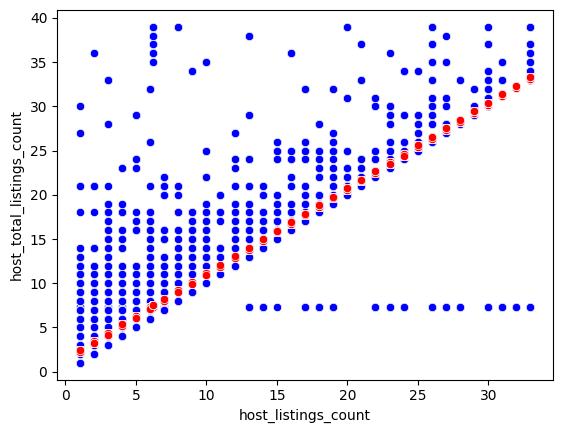

In [374]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='host_listings_count', y='host_total_listings_count', color="blue", data=df)
sns.scatterplot(x='host_listings_count', y='Predicciones4', color="red", data=df)


In [375]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter


0.7106854303567822

In [376]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl


np.float64(0.8430216072893875)

room_type
*************************************************

<Axes: xlabel='accommodates', ylabel='room_type'>

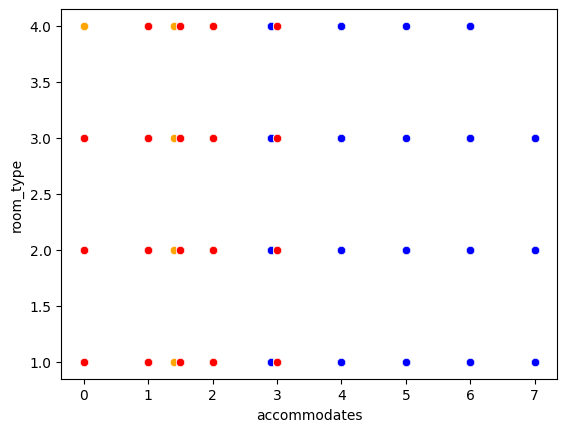

In [377]:
from turtle import color
sns.scatterplot(x='accommodates', y='room_type', color="blue", data=df)
sns.scatterplot(x='bedrooms', y='room_type', color="orange", data=df)
sns.scatterplot(x='beds', y='room_type', color="red", data=df)


In [378]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['accommodates', 'bedrooms', 'beds']]
Var_Dep= df['room_type']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

#Verificamos la función relacionada al modelo
type(model)

#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)


LinearRegression()

In [379]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__


{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['accommodates', 'bedrooms', 'beds'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([-0.14483747, -0.05361506, -0.05635075]),
 'rank_': 3,
 'singular_': array([257.15848395,  85.85677964,  71.84273295]),
 'intercept_': np.float64(1.955369756062189)}

In [380]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)


0.22995358196823223

In [381]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=df[['accommodates', 'bedrooms', 'beds']])
y_pred


array([1.55572901, 1.40392926, 1.15608826, ..., 1.55572901, 1.55572901,
       1.55572901], shape=(26582,))

In [382]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones5', y_pred)
df


,Predicciones5,Predicciones4,Predicciones33,Predicciones2,Predicciones1,host_id,host_acceptance_rate,host_is_superhost,host_total_listings_count,room_type,...,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_cleanliness,review_scores_communication,review_scores_location,has_availability,instant_bookable,id
0,1.555729,2.262205,-0.061864,0.250382,1.378868e+08,153786,0.009,0,1.0,1,...,1.0,7,363,0.0,4.90,4.90,4.90,1,0,35797
1,1.403929,12.849133,0.475768,0.984793,1.378868e+08,196253,0.930,1,13.0,1,...,1.0,365,325,64.0,4.70,4.78,4.98,1,0,44616
2,1.156088,4.187101,0.286121,0.796689,1.378868e+08,334451,0.570,1,4.0,1,...,2.0,30,325,49.0,4.75,4.92,4.98,1,0,67703
3,1.555729,4.187101,0.501184,0.984793,1.378868e+08,212109,1.000,1,4.0,1,...,1.6,180,257,127.0,4.96,4.98,4.96,1,0,70644
4,1.555729,6.111997,0.501184,0.984793,1.378868e+08,540705,1.000,1,7.0,1,...,1.0,365,275,11.0,5.00,4.73,4.91,1,0,107078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,1.156088,7.483767,0.501184,0.984793,3.223868e+08,67472234,1.000,1,7.3,2,...,1.0,45,365,0.0,4.90,4.90,4.90,1,1,1252141718111439700
26578,1.555729,16.915758,0.501184,0.899015,3.223895e+08,596009321,1.000,0,16.0,2,...,1.0,365,177,0.0,4.90,4.90,4.90,1,1,1252159821531694005
26579,1.555729,16.915758,0.501184,0.899015,3.223933e+08,596009321,1.000,0,16.0,2,...,1.0,365,177,0.0,4.90,4.90,4.90,1,1,1252185591721328995
26580,1.555729,16.915758,0.501184,0.899015,3.223981e+08,596009321,1.000,0,16.0,2,...,1.0,365,177,0.0,4.90,4.90,4.90,1,1,1252218347521498445


<Axes: xlabel='beds', ylabel='room_type'>

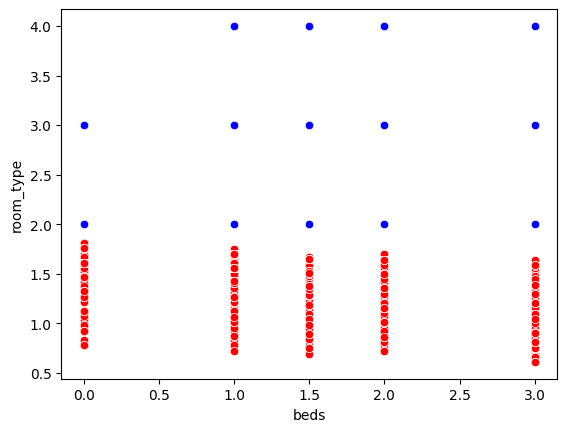

In [383]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='beds', y='room_type', color="blue", data=df)
sns.scatterplot(x='beds', y='Predicciones5', color="red", data=df)


In [384]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter



0.22995358196823223

In [385]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

np.float64(0.47953475574585025)

accommodates
*****************************************************

<Axes: xlabel='bedrooms', ylabel='accommodates'>

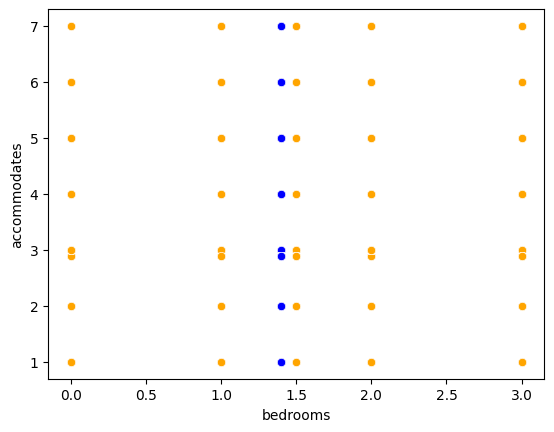

In [386]:
from turtle import color
sns.scatterplot(x='bedrooms', y='accommodates', color="blue", data=df)
sns.scatterplot(x='beds', y='accommodates', color="orange", data=df)


In [387]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['bedrooms', 'beds']]
Var_Dep= df['accommodates']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

#Verificamos la función relacionada al modelo
type(model)

#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)


LinearRegression()

In [388]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__


{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bedrooms', 'beds'], dtype=object),
 'n_features_in_': 2,
 'coef_': array([1.12189728, 0.72485031]),
 'rank_': 2,
 'singular_': array([134.00727009,  75.41427365]),
 'intercept_': np.float64(0.2816937197864551)}

In [389]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)


0.5522371583160037

In [390]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=df[['bedrooms', 'beds']])
y_pred


array([2.12844131, 2.57720022, 3.97518891, ..., 2.12844131, 2.12844131,
       2.12844131], shape=(26582,))

In [391]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones6', y_pred)
df


,Predicciones6,Predicciones5,Predicciones4,Predicciones33,Predicciones2,Predicciones1,host_id,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_cleanliness,review_scores_communication,review_scores_location,has_availability,instant_bookable,id
0,2.128441,1.555729,2.262205,-0.061864,0.250382,1.378868e+08,153786,0.009,0,1.0,...,1.0,7,363,0.0,4.90,4.90,4.90,1,0,35797
1,2.577200,1.403929,12.849133,0.475768,0.984793,1.378868e+08,196253,0.930,1,13.0,...,1.0,365,325,64.0,4.70,4.78,4.98,1,0,44616
2,3.975189,1.156088,4.187101,0.286121,0.796689,1.378868e+08,334451,0.570,1,4.0,...,2.0,30,325,49.0,4.75,4.92,4.98,1,0,67703
3,2.128441,1.555729,4.187101,0.501184,0.984793,1.378868e+08,212109,1.000,1,4.0,...,1.6,180,257,127.0,4.96,4.98,4.96,1,0,70644
4,2.128441,1.555729,6.111997,0.501184,0.984793,1.378868e+08,540705,1.000,1,7.0,...,1.0,365,275,11.0,5.00,4.73,4.91,1,0,107078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,3.975189,1.156088,7.483767,0.501184,0.984793,3.223868e+08,67472234,1.000,1,7.3,...,1.0,45,365,0.0,4.90,4.90,4.90,1,1,1252141718111439700
26578,2.128441,1.555729,16.915758,0.501184,0.899015,3.223895e+08,596009321,1.000,0,16.0,...,1.0,365,177,0.0,4.90,4.90,4.90,1,1,1252159821531694005
26579,2.128441,1.555729,16.915758,0.501184,0.899015,3.223933e+08,596009321,1.000,0,16.0,...,1.0,365,177,0.0,4.90,4.90,4.90,1,1,1252185591721328995
26580,2.128441,1.555729,16.915758,0.501184,0.899015,3.223981e+08,596009321,1.000,0,16.0,...,1.0,365,177,0.0,4.90,4.90,4.90,1,1,1252218347521498445


<Axes: xlabel='bedrooms', ylabel='accommodates'>

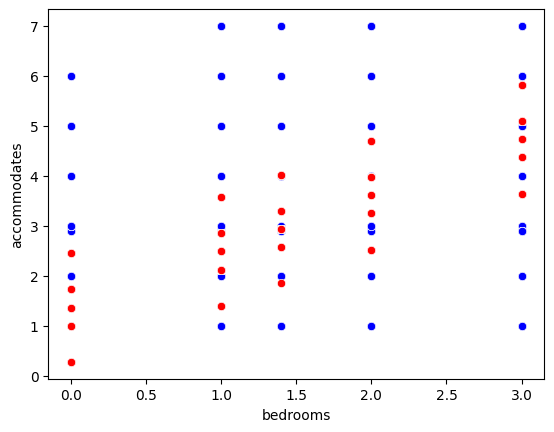

In [392]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='bedrooms', y='accommodates', color="blue", data=df)
sns.scatterplot(x='bedrooms', y='Predicciones6', color="red", data=df)


In [393]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter


0.5522371583160037

In [394]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl


np.float64(0.7431266098828676)

bedrooms
*******************************************************************

<Axes: xlabel='accommodates', ylabel='bedrooms'>

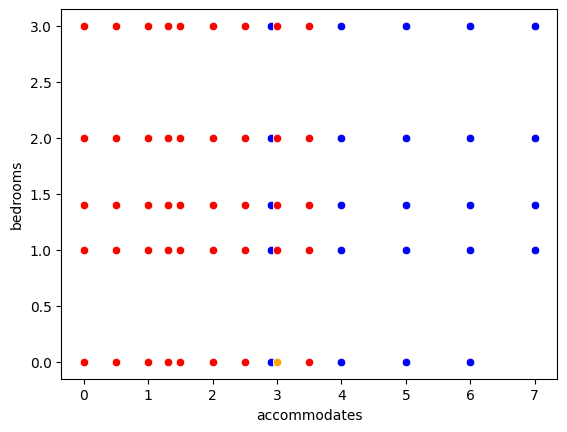

In [395]:
from turtle import color
sns.scatterplot(x='accommodates', y='bedrooms', color="blue", data=df)
sns.scatterplot(x='beds', y='bedrooms', color="orange", data=df)
sns.scatterplot(x='bathrooms', y='bedrooms', color="red", data=df)


In [396]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['accommodates', 'beds', 'bathrooms']]
Var_Dep= df['bedrooms']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

#Verificamos la función relacionada al modelo
type(model)

#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)


LinearRegression()

In [397]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__


{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['accommodates', 'beds', 'bathrooms'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([0.22687257, 0.10645536, 0.30745142]),
 'rank_': 3,
 'singular_': array([248.80204598,  88.15459869,  78.19212685]),
 'intercept_': np.float64(0.17708146968977356)}

In [398]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)


0.5377607006042244

In [399]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=df[['accommodates', 'beds', 'bathrooms']])
y_pred


array([1.04473339, 1.2489187 , 1.60493388, ..., 1.04473339, 1.04473339,
       1.04473339], shape=(26582,))

In [400]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones7', y_pred)
df


,Predicciones7,Predicciones6,Predicciones5,Predicciones4,Predicciones33,Predicciones2,Predicciones1,host_id,host_acceptance_rate,host_is_superhost,...,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_cleanliness,review_scores_communication,review_scores_location,has_availability,instant_bookable,id
0,1.044733,2.128441,1.555729,2.262205,-0.061864,0.250382,1.378868e+08,153786,0.009,0,...,1.0,7,363,0.0,4.90,4.90,4.90,1,0,35797
1,1.248919,2.577200,1.403929,12.849133,0.475768,0.984793,1.378868e+08,196253,0.930,1,...,1.0,365,325,64.0,4.70,4.78,4.98,1,0,44616
2,1.604934,3.975189,1.156088,4.187101,0.286121,0.796689,1.378868e+08,334451,0.570,1,...,2.0,30,325,49.0,4.75,4.92,4.98,1,0,67703
3,1.044733,2.128441,1.555729,4.187101,0.501184,0.984793,1.378868e+08,212109,1.000,1,...,1.6,180,257,127.0,4.96,4.98,4.96,1,0,70644
4,1.198459,2.128441,1.555729,6.111997,0.501184,0.984793,1.378868e+08,540705,1.000,1,...,1.0,365,275,11.0,5.00,4.73,4.91,1,0,107078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,1.604934,3.975189,1.156088,7.483767,0.501184,0.984793,3.223868e+08,67472234,1.000,1,...,1.0,45,365,0.0,4.90,4.90,4.90,1,1,1252141718111439700
26578,1.044733,2.128441,1.555729,16.915758,0.501184,0.899015,3.223895e+08,596009321,1.000,0,...,1.0,365,177,0.0,4.90,4.90,4.90,1,1,1252159821531694005
26579,1.044733,2.128441,1.555729,16.915758,0.501184,0.899015,3.223933e+08,596009321,1.000,0,...,1.0,365,177,0.0,4.90,4.90,4.90,1,1,1252185591721328995
26580,1.044733,2.128441,1.555729,16.915758,0.501184,0.899015,3.223981e+08,596009321,1.000,0,...,1.0,365,177,0.0,4.90,4.90,4.90,1,1,1252218347521498445


<Axes: xlabel='bathrooms', ylabel='bedrooms'>

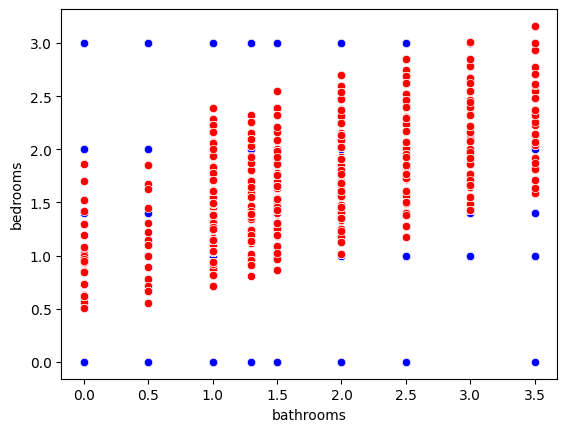

In [401]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='bathrooms', y='bedrooms', color="blue", data=df)
sns.scatterplot(x='bathrooms', y='Predicciones7', color="red", data=df)


In [402]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter


0.5377607006042244

In [403]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl


np.float64(0.7333216897134739)

price
*****************************************************

<Axes: xlabel='room_type', ylabel='price'>

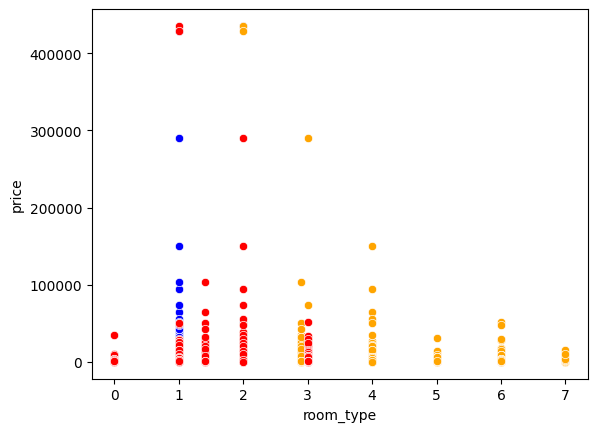

In [404]:
from turtle import color
sns.scatterplot(x='room_type', y='price', color="blue", data=df)
sns.scatterplot(x='accommodates', y='price', color="orange", data=df)
sns.scatterplot(x='bedrooms', y='price', color="red", data=df)


In [405]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['room_type', 'accommodates', 'bedrooms']]
Var_Dep= df['price']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

#Verificamos la función relacionada al modelo
type(model)

#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)


LinearRegression()

In [406]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__


{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['room_type', 'accommodates', 'bedrooms'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([-437.74137863,   77.99485568,  369.22444477]),
 'rank_': 3,
 'singular_': array([250.23030017,  76.28934042,  73.11374756]),
 'intercept_': np.float64(1208.6918208981913)}

In [407]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)


0.009888489012670365

In [408]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=df[['room_type', 'accommodates', 'bedrooms']])
y_pred


array([1296.16459841, 1514.04974643, 1821.37875455, ...,  858.42321977,
        858.42321977, 1296.16459841], shape=(26582,))

In [409]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones8', y_pred)
df


,Predicciones8,Predicciones7,Predicciones6,Predicciones5,Predicciones4,Predicciones33,Predicciones2,Predicciones1,host_id,host_acceptance_rate,...,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_cleanliness,review_scores_communication,review_scores_location,has_availability,instant_bookable,id
0,1296.164598,1.044733,2.128441,1.555729,2.262205,-0.061864,0.250382,1.378868e+08,153786,0.009,...,1.0,7,363,0.0,4.90,4.90,4.90,1,0,35797
1,1514.049746,1.248919,2.577200,1.403929,12.849133,0.475768,0.984793,1.378868e+08,196253,0.930,...,1.0,365,325,64.0,4.70,4.78,4.98,1,0,44616
2,1821.378755,1.604934,3.975189,1.156088,4.187101,0.286121,0.796689,1.378868e+08,334451,0.570,...,2.0,30,325,49.0,4.75,4.92,4.98,1,0,67703
3,1296.164598,1.044733,2.128441,1.555729,4.187101,0.501184,0.984793,1.378868e+08,212109,1.000,...,1.6,180,257,127.0,4.96,4.98,4.96,1,0,70644
4,1296.164598,1.198459,2.128441,1.555729,6.111997,0.501184,0.984793,1.378868e+08,540705,1.000,...,1.0,365,275,11.0,5.00,4.73,4.91,1,0,107078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,1383.637376,1.604934,3.975189,1.156088,7.483767,0.501184,0.984793,3.223868e+08,67472234,1.000,...,1.0,45,365,0.0,4.90,4.90,4.90,1,1,1252141718111439700
26578,858.423220,1.044733,2.128441,1.555729,16.915758,0.501184,0.899015,3.223895e+08,596009321,1.000,...,1.0,365,177,0.0,4.90,4.90,4.90,1,1,1252159821531694005
26579,858.423220,1.044733,2.128441,1.555729,16.915758,0.501184,0.899015,3.223933e+08,596009321,1.000,...,1.0,365,177,0.0,4.90,4.90,4.90,1,1,1252185591721328995
26580,858.423220,1.044733,2.128441,1.555729,16.915758,0.501184,0.899015,3.223981e+08,596009321,1.000,...,1.0,365,177,0.0,4.90,4.90,4.90,1,1,1252218347521498445


<Axes: xlabel='bedrooms', ylabel='price'>

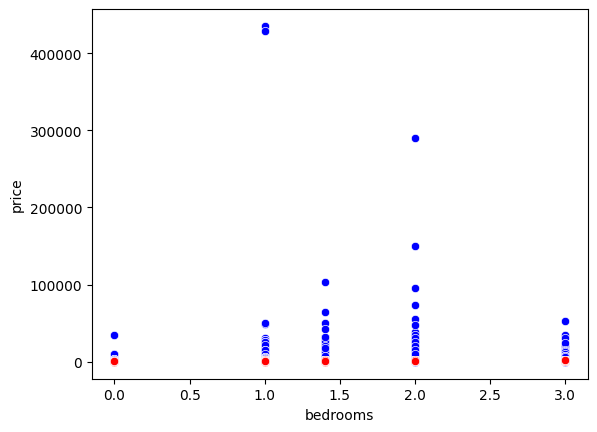

In [410]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='bedrooms', y='price', color="blue", data=df)
sns.scatterplot(x='bedrooms', y='Predicciones8', color="red", data=df)



In [411]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter


0.009888489012670365

In [412]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl


np.float64(0.09944088199865468)

review_scores_value 
******************************************************************

<Axes: xlabel='accommodates', ylabel='beds'>

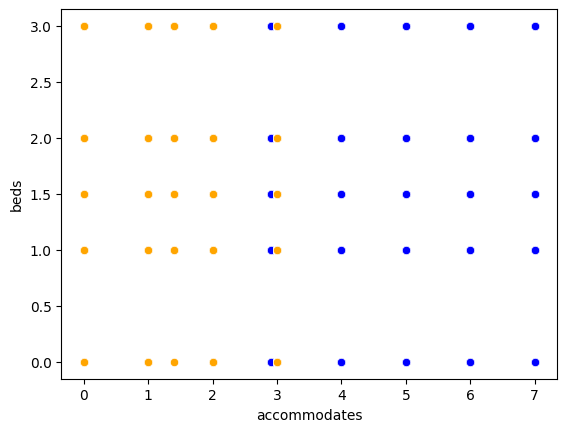

In [413]:
from turtle import color
sns.scatterplot(x='accommodates', y='beds', color="blue", data=df)
sns.scatterplot(x='bedrooms', y='beds', color="orange", data=df)


In [414]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['accommodates', 'bedrooms']]
Var_Dep= df['beds']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

#Verificamos la función relacionada al modelo
type(model)

#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)


LinearRegression()

In [415]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__


{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['accommodates', 'bedrooms'], dtype=object),
 'n_features_in_': 2,
 'coef_': array([0.22793706, 0.20549774]),
 'rank_': 2,
 'singular_': array([246.31355721,  73.16616425]),
 'intercept_': np.float64(0.5270625800749718)}

In [416]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)


0.3871047764999409

In [417]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=df[['accommodates', 'bedrooms']])
y_pred



array([1.18843445, 1.4757769 , 1.84980632, ..., 1.18843445, 1.18843445,
       1.18843445], shape=(26582,))

In [418]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones9', y_pred)
df


,Predicciones9,Predicciones8,Predicciones7,Predicciones6,Predicciones5,Predicciones4,Predicciones33,Predicciones2,Predicciones1,host_id,...,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_cleanliness,review_scores_communication,review_scores_location,has_availability,instant_bookable,id
0,1.188434,1296.164598,1.044733,2.128441,1.555729,2.262205,-0.061864,0.250382,1.378868e+08,153786,...,1.0,7,363,0.0,4.90,4.90,4.90,1,0,35797
1,1.475777,1514.049746,1.248919,2.577200,1.403929,12.849133,0.475768,0.984793,1.378868e+08,196253,...,1.0,365,325,64.0,4.70,4.78,4.98,1,0,44616
2,1.849806,1821.378755,1.604934,3.975189,1.156088,4.187101,0.286121,0.796689,1.378868e+08,334451,...,2.0,30,325,49.0,4.75,4.92,4.98,1,0,67703
3,1.188434,1296.164598,1.044733,2.128441,1.555729,4.187101,0.501184,0.984793,1.378868e+08,212109,...,1.6,180,257,127.0,4.96,4.98,4.96,1,0,70644
4,1.188434,1296.164598,1.198459,2.128441,1.555729,6.111997,0.501184,0.984793,1.378868e+08,540705,...,1.0,365,275,11.0,5.00,4.73,4.91,1,0,107078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,1.849806,1383.637376,1.604934,3.975189,1.156088,7.483767,0.501184,0.984793,3.223868e+08,67472234,...,1.0,45,365,0.0,4.90,4.90,4.90,1,1,1252141718111439700
26578,1.188434,858.423220,1.044733,2.128441,1.555729,16.915758,0.501184,0.899015,3.223895e+08,596009321,...,1.0,365,177,0.0,4.90,4.90,4.90,1,1,1252159821531694005
26579,1.188434,858.423220,1.044733,2.128441,1.555729,16.915758,0.501184,0.899015,3.223933e+08,596009321,...,1.0,365,177,0.0,4.90,4.90,4.90,1,1,1252185591721328995
26580,1.188434,858.423220,1.044733,2.128441,1.555729,16.915758,0.501184,0.899015,3.223981e+08,596009321,...,1.0,365,177,0.0,4.90,4.90,4.90,1,1,1252218347521498445


<Axes: xlabel='accommodates', ylabel='beds'>

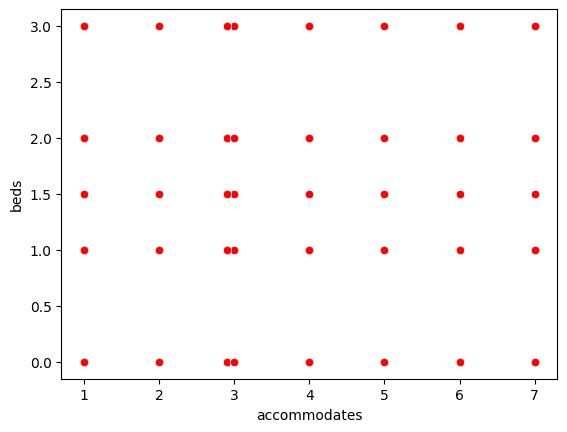

In [419]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='accommodates', y='beds', color="blue", data=df)
sns.scatterplot(x='accommodates', y='beds', color="red", data=df)


In [420]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter


0.3871047764999409

In [421]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl


np.float64(0.6221774477590303)

reviews_per_month
*******************************************************

<Axes: xlabel='number_of_reviews', ylabel='reviews_per_month'>

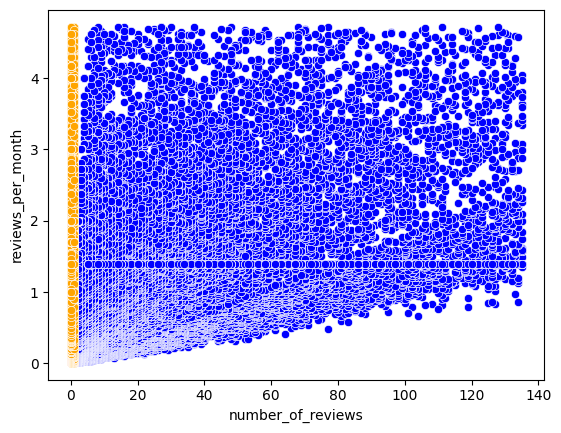

In [422]:
from turtle import color
sns.scatterplot(x='number_of_reviews', y='reviews_per_month', color="blue", data=df)
sns.scatterplot(x='host_is_superhost', y='reviews_per_month', color="orange", data=df)


In [423]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['number_of_reviews', 'host_is_superhost']]
Var_Dep= df['reviews_per_month']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

#Verificamos la función relacionada al modelo
type(model)

#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)


LinearRegression()

In [424]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__


{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews', 'host_is_superhost'], dtype=object),
 'n_features_in_': 2,
 'coef_': array([0.01122761, 0.29280675]),
 'rank_': 2,
 'singular_': array([5114.31621964,   76.06463406]),
 'intercept_': np.float64(1.0196213836200918)}

In [425]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)


0.1497011532935667

In [426]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=df[['number_of_reviews', 'host_is_superhost']])
y_pred



array([1.01962138, 2.03099513, 1.86258099, ..., 1.01962138, 1.01962138,
       1.31242813], shape=(26582,))

In [427]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones10', y_pred)
df


,Predicciones10,Predicciones9,Predicciones8,Predicciones7,Predicciones6,Predicciones5,Predicciones4,Predicciones33,Predicciones2,Predicciones1,...,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_cleanliness,review_scores_communication,review_scores_location,has_availability,instant_bookable,id
0,1.019621,1.188434,1296.164598,1.044733,2.128441,1.555729,2.262205,-0.061864,0.250382,1.378868e+08,...,1.0,7,363,0.0,4.90,4.90,4.90,1,0,35797
1,2.030995,1.475777,1514.049746,1.248919,2.577200,1.403929,12.849133,0.475768,0.984793,1.378868e+08,...,1.0,365,325,64.0,4.70,4.78,4.98,1,0,44616
2,1.862581,1.849806,1821.378755,1.604934,3.975189,1.156088,4.187101,0.286121,0.796689,1.378868e+08,...,2.0,30,325,49.0,4.75,4.92,4.98,1,0,67703
3,2.738335,1.188434,1296.164598,1.044733,2.128441,1.555729,4.187101,0.501184,0.984793,1.378868e+08,...,1.6,180,257,127.0,4.96,4.98,4.96,1,0,70644
4,1.435932,1.188434,1296.164598,1.198459,2.128441,1.555729,6.111997,0.501184,0.984793,1.378868e+08,...,1.0,365,275,11.0,5.00,4.73,4.91,1,0,107078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,1.312428,1.849806,1383.637376,1.604934,3.975189,1.156088,7.483767,0.501184,0.984793,3.223868e+08,...,1.0,45,365,0.0,4.90,4.90,4.90,1,1,1252141718111439700
26578,1.019621,1.188434,858.423220,1.044733,2.128441,1.555729,16.915758,0.501184,0.899015,3.223895e+08,...,1.0,365,177,0.0,4.90,4.90,4.90,1,1,1252159821531694005
26579,1.019621,1.188434,858.423220,1.044733,2.128441,1.555729,16.915758,0.501184,0.899015,3.223933e+08,...,1.0,365,177,0.0,4.90,4.90,4.90,1,1,1252185591721328995
26580,1.019621,1.188434,858.423220,1.044733,2.128441,1.555729,16.915758,0.501184,0.899015,3.223981e+08,...,1.0,365,177,0.0,4.90,4.90,4.90,1,1,1252218347521498445


<Axes: xlabel='host_is_superhost', ylabel='reviews_per_month'>

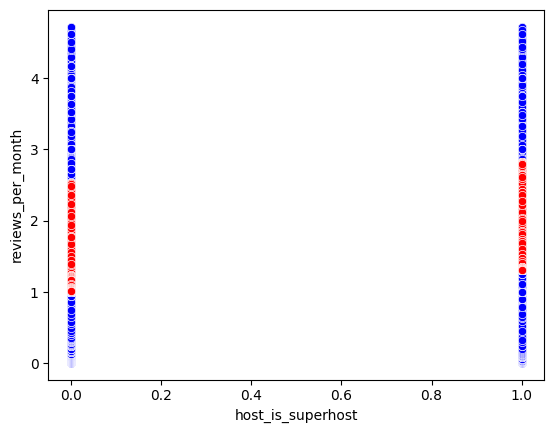

In [428]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='host_is_superhost', y='reviews_per_month', color="blue", data=df)
sns.scatterplot(x='host_is_superhost', y='Predicciones10', color="red", data=df)


In [429]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter


0.1497011532935667

In [430]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl



np.float64(0.3869123328269166)

*************************************************

<Axes: >

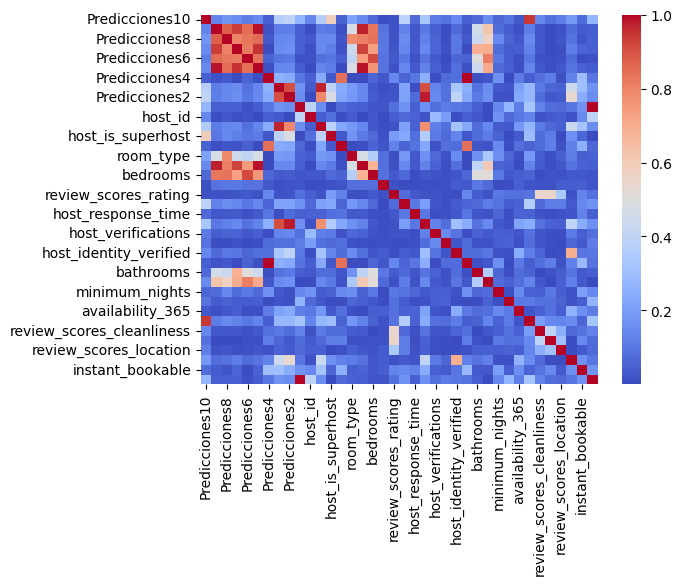

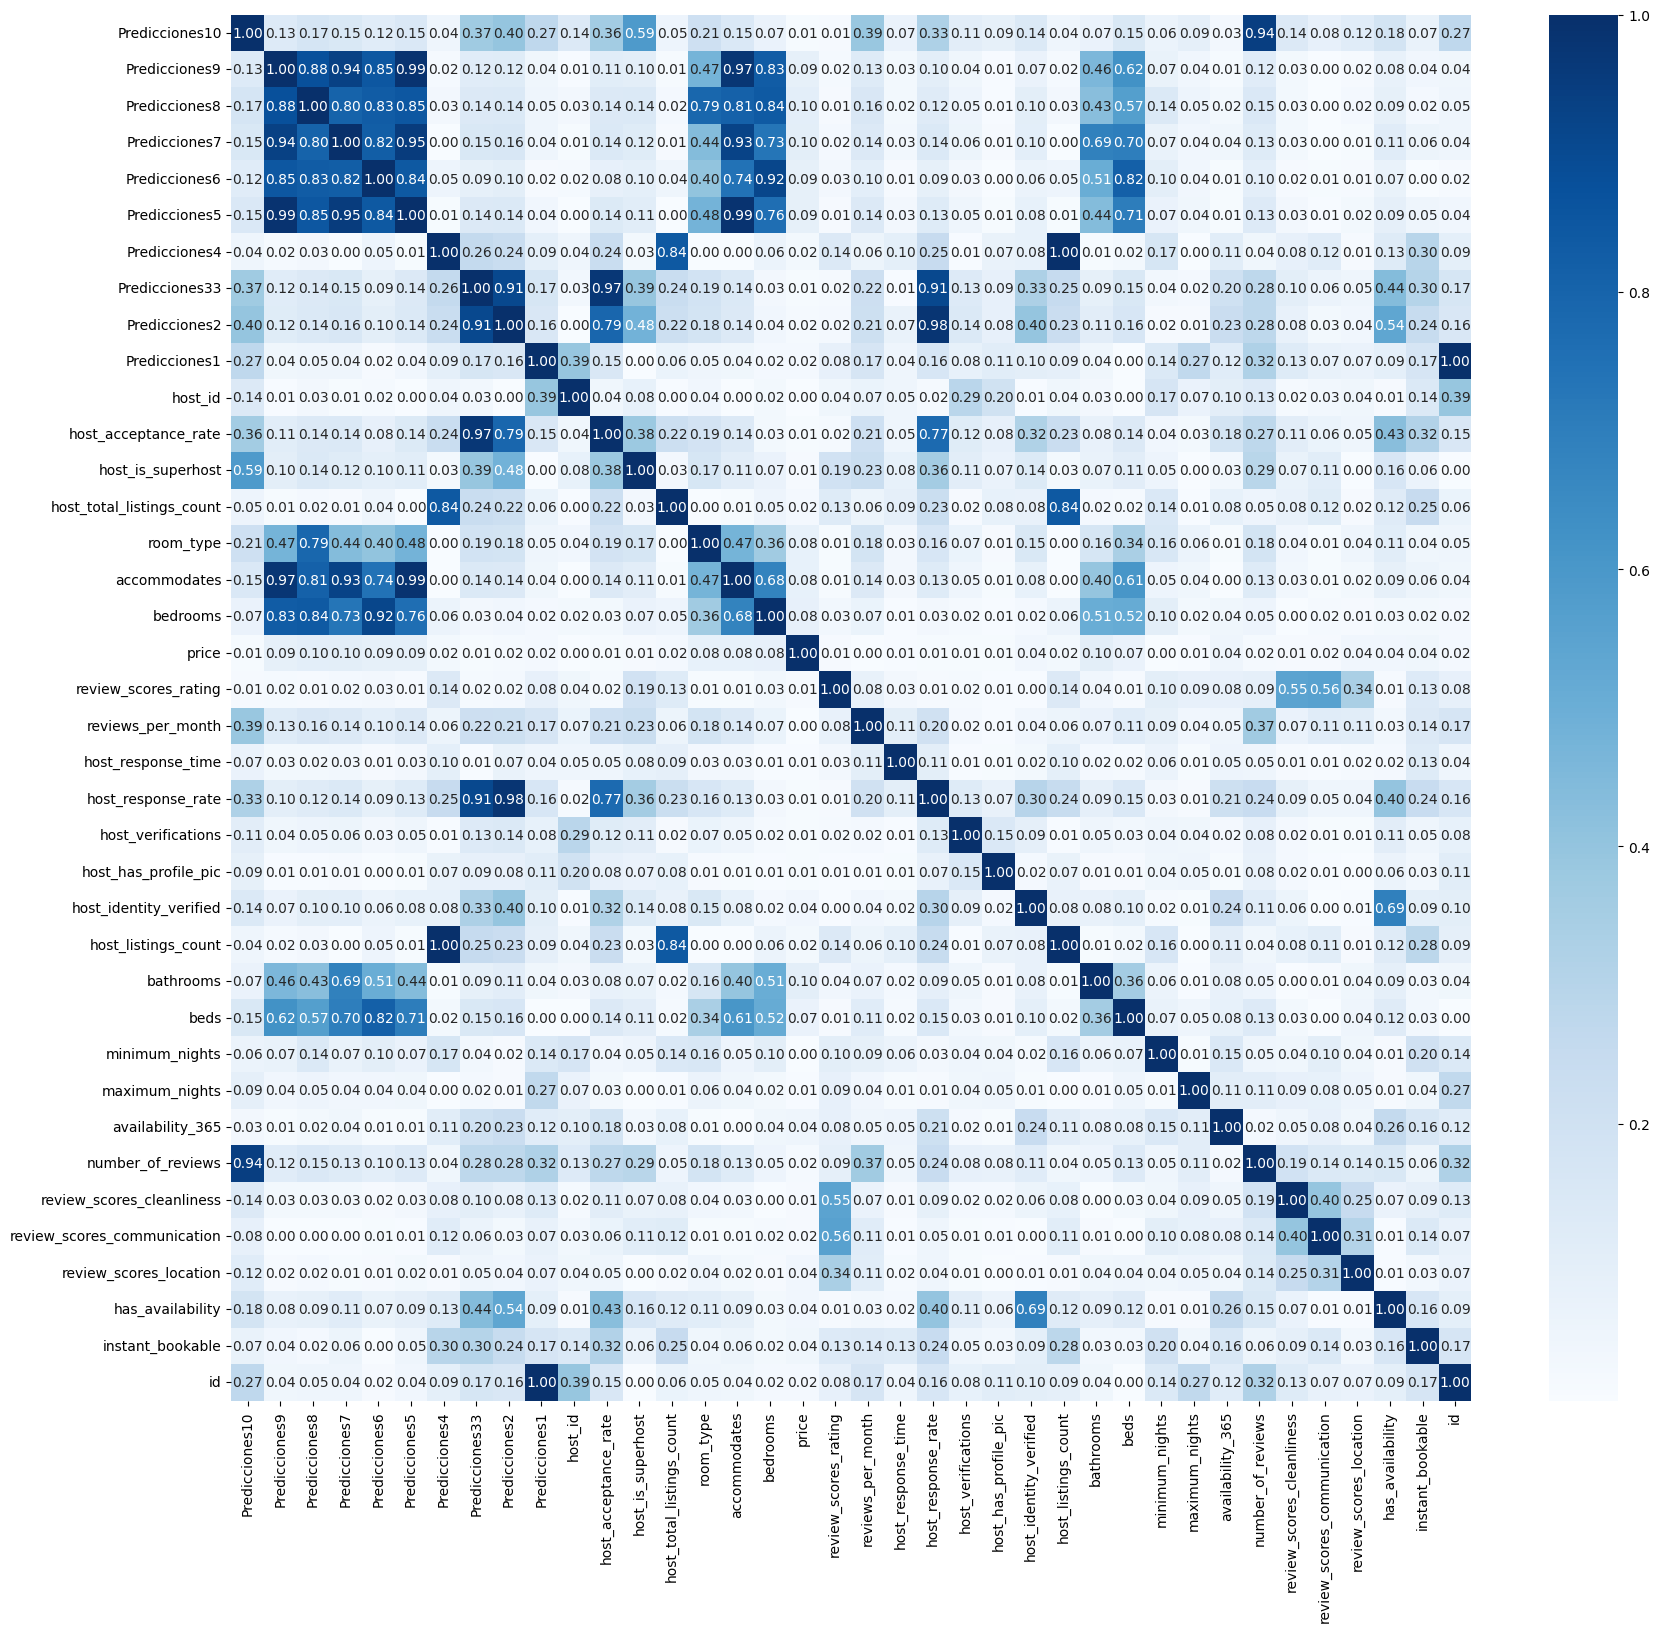

In [431]:
#Encontramos todas las correlaciones entre las varaibles
Corr_Factors=df.corr()
Corr_Factors

#Enocntramos el valor absoluto de todas las relaciones entre las varaibles
Corr_Factors1=abs(Corr_Factors)
Corr_Factors1

#Graficamos el mapa de calor de los coeficientes de correlación
Heat_Map = sns.heatmap(Corr_Factors1, cmap='coolwarm')
Heat_Map

#Ajustamos el mapa de calor de los coeficientes de correlación
plt.figure(figsize=(20, 18))
Heat_Map=sns.heatmap(Corr_Factors1,cmap='Blues', annot=True, fmt=".2f",)
Heat_Map

In [432]:
# Convertir columna de porcentaje a float
################df['host_acceptance_rate'] = df['host_acceptance_rate'].str.rstrip('%').astype(float) / 100

# Convertir valores 'T'/'F' en 1/0
################df['host_is_superhost'] = df['host_is_superhost'].map({'t': 1, 'f': 0})

# Convertir precios a número (si tiene "$" u otros caracteres)
################df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)


In [433]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Predicciones10               26582 non-null  float64
 1   Predicciones9                26582 non-null  float64
 2   Predicciones8                26582 non-null  float64
 3   Predicciones7                26582 non-null  float64
 4   Predicciones6                26582 non-null  float64
 5   Predicciones5                26582 non-null  float64
 6   Predicciones4                26582 non-null  float64
 7   Predicciones33               26582 non-null  float64
 8   Predicciones2                26582 non-null  float64
 9   Predicciones1                26582 non-null  float64
 10  host_id                      26582 non-null  int64  
 11  host_acceptance_rate         26582 non-null  float64
 12  host_is_superhost            26582 non-null  int64  
 13  host_total_listi